In [1]:
import pandas as pd
import numpy as np

df = pd.read_excel("AirQualityUCI_complete_data.xlsx")
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [2]:
df = df.drop(["Date","Time"],axis=1)
df.head()

# Replace -200 (i.e. missing values) to mean value
df[:] = df[:].replace(-200,np.nan)
df.fillna(df.mean(), inplace=True)

In [3]:
def normalize(dataset):
    dataNorm=((dataset-dataset.min())/(dataset.max()-dataset.min()))
    return dataNorm

df_normalize = normalize(df)
df_normalize.head(5)

# Check for null values

# print(df_normalize.isnull().sum())
# print(df_normalize[:].max())

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,0.211864,0.511849,0.120981,0.184498,0.361737,0.111036,0.311024,0.328694,0.513040,0.454654,0.333333,0.499057,0.280046
1,0.161017,0.463196,0.088832,0.145428,0.312167,0.068382,0.360796,0.266509,0.453125,0.326382,0.326882,0.484287,0.264279
2,0.177966,0.542011,0.068528,0.139148,0.303701,0.087339,0.346500,0.331655,0.451214,0.370588,0.296774,0.563168,0.276374
3,0.177966,0.522980,0.061760,0.142780,0.308617,0.115098,0.326168,0.355345,0.464366,0.426741,0.277419,0.638906,0.294198
4,0.127119,0.448833,0.037225,0.100156,0.247030,0.087339,0.374034,0.337578,0.422212,0.386228,0.280645,0.633564,0.295215


In [4]:
# Split x_train and x_test
x_train = df_normalize

In [5]:
from keras.models import Model
from keras.layers import Dense, Input
from keras.optimizers import Adam
import keras
keras.backend.set_epsilon(0.001) # For mape error

# Autoenoder
input_size = 13
hidden_size_1 = 12
hidden_size_2 = 12
code_size = 12
activation = 'tanh'

input_layer = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size_1, activation=activation)(input_layer)
hidden_12 = Dense(hidden_size_2, activation=activation)(hidden_1)
code = Dense(code_size)(hidden_12)
hidden_22 = Dense(hidden_size_2, activation=activation)(code)
hidden_2 = Dense(hidden_size_1, activation=activation)(hidden_22)
output_layer = Dense(input_size)(hidden_2)

# input_layer = Input(shape=(input_size,))
# hidden_1 = Dense(hidden_size_1, activation='tanh')(input_layer)
# code = Dense(code_size)(hidden_1)
# hidden_2 = Dense(hidden_size_1, activation='tanh')(code)
# output_layer = Dense(input_size)(hidden_2)

autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer=Adam(lr=0.001, epsilon=1e-08), loss='mse', metrics=['mape'])
history = autoencoder.fit(x_train, x_train, epochs=1000, validation_split=0.2, batch_size=32)



Using TensorFlow backend.
W0313 21:32:39.407558 14552 deprecation_wrapper.py:119] From C:\Users\Kiran\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0313 21:32:39.440912 14552 deprecation_wrapper.py:119] From C:\Users\Kiran\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0313 21:32:39.446662 14552 deprecation_wrapper.py:119] From C:\Users\Kiran\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0313 21:32:39.664312 14552 deprecation_wrapper.py:119] From C:\Users\Kiran\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0313 21:32:39.938617 14552 deprecation_wrapper.py:119

Train on 7485 samples, validate on 1872 samples
Epoch 1/1000
7485/7485 [==============================] - 2s 263us/step - loss: 0.0335 - mean_absolute_percentage_error: 57.7754 - val_loss: 0.0094 - val_mean_absolute_percentage_error: 55.4895
Epoch 2/1000
7485/7485 [==============================] - 1s 68us/step - loss: 0.0041 - mean_absolute_percentage_error: 26.7358 - val_loss: 0.0063 - val_mean_absolute_percentage_error: 44.0999
Epoch 3/1000
7485/7485 [==============================] - 1s 67us/step - loss: 0.0027 - mean_absolute_percentage_error: 21.7029 - val_loss: 0.0044 - val_mean_absolute_percentage_error: 40.5281
Epoch 4/1000
7485/7485 [==============================] - 1s 67us/step - loss: 0.0019 - mean_absolute_percentage_error: 18.9611 - val_loss: 0.0032 - val_mean_absolute_percentage_error: 36.4208
Epoch 5/1000
7485/7485 [==============================] - 0s 67us/step - loss: 0.0016 - mean_absolute_percentage_error: 17.7455 - val_loss: 0.0027 - val_mean_absolute_percentage_e

Epoch 42/1000
7485/7485 [==============================] - 1s 67us/step - loss: 1.6567e-04 - mean_absolute_percentage_error: 5.8253 - val_loss: 3.7205e-04 - val_mean_absolute_percentage_error: 15.6878
Epoch 43/1000
7485/7485 [==============================] - 1s 67us/step - loss: 1.5952e-04 - mean_absolute_percentage_error: 5.7379 - val_loss: 3.4751e-04 - val_mean_absolute_percentage_error: 15.6033
Epoch 44/1000
7485/7485 [==============================] - 0s 67us/step - loss: 1.5627e-04 - mean_absolute_percentage_error: 5.6406 - val_loss: 3.0798e-04 - val_mean_absolute_percentage_error: 14.4581
Epoch 45/1000
7485/7485 [==============================] - 1s 67us/step - loss: 1.5304e-04 - mean_absolute_percentage_error: 5.5957 - val_loss: 3.2088e-04 - val_mean_absolute_percentage_error: 15.2365
Epoch 46/1000
7485/7485 [==============================] - 1s 67us/step - loss: 1.5344e-04 - mean_absolute_percentage_error: 5.5933 - val_loss: 3.1342e-04 - val_mean_absolute_percentage_error: 15.

Epoch 83/1000
7485/7485 [==============================] - 0s 67us/step - loss: 9.4047e-05 - mean_absolute_percentage_error: 4.3818 - val_loss: 1.4600e-04 - val_mean_absolute_percentage_error: 12.5293
Epoch 84/1000
7485/7485 [==============================] - 1s 67us/step - loss: 9.3696e-05 - mean_absolute_percentage_error: 4.3817 - val_loss: 1.5365e-04 - val_mean_absolute_percentage_error: 12.6776
Epoch 85/1000
7485/7485 [==============================] - 1s 67us/step - loss: 9.4262e-05 - mean_absolute_percentage_error: 4.3709 - val_loss: 1.5376e-04 - val_mean_absolute_percentage_error: 12.5067
Epoch 86/1000
7485/7485 [==============================] - 0s 67us/step - loss: 9.4662e-05 - mean_absolute_percentage_error: 4.4047 - val_loss: 1.5335e-04 - val_mean_absolute_percentage_error: 12.0737
Epoch 87/1000
7485/7485 [==============================] - 1s 67us/step - loss: 9.3390e-05 - mean_absolute_percentage_error: 4.3912 - val_loss: 1.6931e-04 - val_mean_absolute_percentage_error: 13.

Epoch 124/1000
7485/7485 [==============================] - 0s 66us/step - loss: 8.8475e-05 - mean_absolute_percentage_error: 4.2129 - val_loss: 1.4691e-04 - val_mean_absolute_percentage_error: 12.6332
Epoch 125/1000
7485/7485 [==============================] - 1s 67us/step - loss: 8.8039e-05 - mean_absolute_percentage_error: 4.1786 - val_loss: 1.6519e-04 - val_mean_absolute_percentage_error: 13.3136
Epoch 126/1000
7485/7485 [==============================] - 1s 67us/step - loss: 8.9092e-05 - mean_absolute_percentage_error: 4.1960 - val_loss: 1.5998e-04 - val_mean_absolute_percentage_error: 13.3207
Epoch 127/1000
7485/7485 [==============================] - 1s 68us/step - loss: 8.7295e-05 - mean_absolute_percentage_error: 4.1816 - val_loss: 1.6301e-04 - val_mean_absolute_percentage_error: 12.8066
Epoch 128/1000
7485/7485 [==============================] - 1s 67us/step - loss: 8.8335e-05 - mean_absolute_percentage_error: 4.1828 - val_loss: 1.4264e-04 - val_mean_absolute_percentage_error

Epoch 205/1000
7485/7485 [==============================] - 1s 68us/step - loss: 8.4585e-05 - mean_absolute_percentage_error: 4.0012 - val_loss: 1.6249e-04 - val_mean_absolute_percentage_error: 12.9528
Epoch 206/1000
7485/7485 [==============================] - 1s 67us/step - loss: 8.5483e-05 - mean_absolute_percentage_error: 4.0534 - val_loss: 1.7253e-04 - val_mean_absolute_percentage_error: 13.7966
Epoch 207/1000
7485/7485 [==============================] - 1s 67us/step - loss: 8.4750e-05 - mean_absolute_percentage_error: 4.0436 - val_loss: 1.5976e-04 - val_mean_absolute_percentage_error: 13.0503
Epoch 208/1000
7485/7485 [==============================] - 0s 66us/step - loss: 8.4920e-05 - mean_absolute_percentage_error: 4.0285 - val_loss: 1.6020e-04 - val_mean_absolute_percentage_error: 12.6951
Epoch 209/1000
7485/7485 [==============================] - 1s 67us/step - loss: 8.5823e-05 - mean_absolute_percentage_error: 4.0672 - val_loss: 1.4574e-04 - val_mean_absolute_percentage_error

Epoch 286/1000
7485/7485 [==============================] - 1s 67us/step - loss: 6.0278e-05 - mean_absolute_percentage_error: 3.3300 - val_loss: 8.3122e-05 - val_mean_absolute_percentage_error: 6.2270
Epoch 287/1000
7485/7485 [==============================] - 1s 68us/step - loss: 5.9462e-05 - mean_absolute_percentage_error: 3.2783 - val_loss: 9.8213e-05 - val_mean_absolute_percentage_error: 6.6848
Epoch 288/1000
7485/7485 [==============================] - 1s 67us/step - loss: 5.9566e-05 - mean_absolute_percentage_error: 3.3100 - val_loss: 8.8996e-05 - val_mean_absolute_percentage_error: 6.7240
Epoch 289/1000
7485/7485 [==============================] - 1s 67us/step - loss: 6.1971e-05 - mean_absolute_percentage_error: 3.3934 - val_loss: 8.9062e-05 - val_mean_absolute_percentage_error: 6.0105
Epoch 290/1000
7485/7485 [==============================] - 1s 106us/step - loss: 5.9843e-05 - mean_absolute_percentage_error: 3.3083 - val_loss: 8.6039e-05 - val_mean_absolute_percentage_error: 6

Epoch 367/1000
7485/7485 [==============================] - 1s 67us/step - loss: 5.4773e-05 - mean_absolute_percentage_error: 3.0048 - val_loss: 8.3965e-05 - val_mean_absolute_percentage_error: 6.3286
Epoch 368/1000
7485/7485 [==============================] - 1s 67us/step - loss: 5.5301e-05 - mean_absolute_percentage_error: 2.9826 - val_loss: 8.4788e-05 - val_mean_absolute_percentage_error: 5.8053
Epoch 369/1000
7485/7485 [==============================] - 0s 67us/step - loss: 5.4550e-05 - mean_absolute_percentage_error: 2.9705 - val_loss: 8.1144e-05 - val_mean_absolute_percentage_error: 5.9641
Epoch 370/1000
7485/7485 [==============================] - 0s 67us/step - loss: 5.4038e-05 - mean_absolute_percentage_error: 2.9281 - val_loss: 9.4964e-05 - val_mean_absolute_percentage_error: 6.3532
Epoch 371/1000
7485/7485 [==============================] - 1s 68us/step - loss: 5.3725e-05 - mean_absolute_percentage_error: 2.9361 - val_loss: 8.5242e-05 - val_mean_absolute_percentage_error: 6.

Epoch 408/1000
7485/7485 [==============================] - 1s 74us/step - loss: 5.3352e-05 - mean_absolute_percentage_error: 2.8811 - val_loss: 1.0811e-04 - val_mean_absolute_percentage_error: 6.3402
Epoch 409/1000
7485/7485 [==============================] - 1s 68us/step - loss: 5.3707e-05 - mean_absolute_percentage_error: 2.9402 - val_loss: 8.5523e-05 - val_mean_absolute_percentage_error: 6.6534
Epoch 410/1000
7485/7485 [==============================] - 1s 68us/step - loss: 5.3571e-05 - mean_absolute_percentage_error: 2.9146 - val_loss: 9.5731e-05 - val_mean_absolute_percentage_error: 6.9815
Epoch 411/1000
7485/7485 [==============================] - 1s 68us/step - loss: 5.3573e-05 - mean_absolute_percentage_error: 2.9133 - val_loss: 8.8656e-05 - val_mean_absolute_percentage_error: 6.7323
Epoch 412/1000
7485/7485 [==============================] - 1s 67us/step - loss: 5.3077e-05 - mean_absolute_percentage_error: 2.8788 - val_loss: 9.2131e-05 - val_mean_absolute_percentage_error: 5.

Epoch 449/1000
7485/7485 [==============================] - 1s 68us/step - loss: 5.3283e-05 - mean_absolute_percentage_error: 2.9302 - val_loss: 9.7474e-05 - val_mean_absolute_percentage_error: 6.1966
Epoch 450/1000
7485/7485 [==============================] - 1s 68us/step - loss: 5.2888e-05 - mean_absolute_percentage_error: 2.8749 - val_loss: 9.0002e-05 - val_mean_absolute_percentage_error: 6.4149
Epoch 451/1000
7485/7485 [==============================] - 1s 68us/step - loss: 5.3268e-05 - mean_absolute_percentage_error: 2.9350 - val_loss: 7.9222e-05 - val_mean_absolute_percentage_error: 6.5156
Epoch 452/1000
7485/7485 [==============================] - 0s 67us/step - loss: 5.2494e-05 - mean_absolute_percentage_error: 2.9285 - val_loss: 9.1548e-05 - val_mean_absolute_percentage_error: 6.0444
Epoch 453/1000
7485/7485 [==============================] - 1s 68us/step - loss: 5.3193e-05 - mean_absolute_percentage_error: 2.8985 - val_loss: 9.7522e-05 - val_mean_absolute_percentage_error: 6.

Epoch 490/1000
7485/7485 [==============================] - 1s 67us/step - loss: 1.8953e-05 - mean_absolute_percentage_error: 1.9203 - val_loss: 4.4517e-05 - val_mean_absolute_percentage_error: 4.9713
Epoch 491/1000
7485/7485 [==============================] - 0s 67us/step - loss: 1.8948e-05 - mean_absolute_percentage_error: 1.9371 - val_loss: 3.9564e-05 - val_mean_absolute_percentage_error: 5.2015
Epoch 492/1000
7485/7485 [==============================] - 1s 69us/step - loss: 1.8151e-05 - mean_absolute_percentage_error: 1.8759 - val_loss: 3.4679e-05 - val_mean_absolute_percentage_error: 4.7991
Epoch 493/1000
7485/7485 [==============================] - 1s 68us/step - loss: 1.8181e-05 - mean_absolute_percentage_error: 1.8648 - val_loss: 3.5225e-05 - val_mean_absolute_percentage_error: 4.9043
Epoch 494/1000
7485/7485 [==============================] - 1s 67us/step - loss: 1.7712e-05 - mean_absolute_percentage_error: 1.8417 - val_loss: 4.3884e-05 - val_mean_absolute_percentage_error: 5.

Epoch 531/1000
7485/7485 [==============================] - 1s 67us/step - loss: 1.5979e-05 - mean_absolute_percentage_error: 1.7796 - val_loss: 5.5162e-05 - val_mean_absolute_percentage_error: 7.0089
Epoch 532/1000
7485/7485 [==============================] - 1s 69us/step - loss: 1.6942e-05 - mean_absolute_percentage_error: 1.8769 - val_loss: 3.4125e-05 - val_mean_absolute_percentage_error: 5.2839
Epoch 533/1000
7485/7485 [==============================] - 1s 68us/step - loss: 1.6126e-05 - mean_absolute_percentage_error: 1.7480 - val_loss: 3.5210e-05 - val_mean_absolute_percentage_error: 5.3696
Epoch 534/1000
7485/7485 [==============================] - 1s 67us/step - loss: 1.5862e-05 - mean_absolute_percentage_error: 1.7824 - val_loss: 4.3178e-05 - val_mean_absolute_percentage_error: 5.7483
Epoch 535/1000
7485/7485 [==============================] - 1s 67us/step - loss: 1.6001e-05 - mean_absolute_percentage_error: 1.7546 - val_loss: 4.3900e-05 - val_mean_absolute_percentage_error: 5.

Epoch 572/1000
7485/7485 [==============================] - 1s 67us/step - loss: 1.4939e-05 - mean_absolute_percentage_error: 1.6646 - val_loss: 3.6543e-05 - val_mean_absolute_percentage_error: 5.8244
Epoch 573/1000
7485/7485 [==============================] - 1s 67us/step - loss: 1.5370e-05 - mean_absolute_percentage_error: 1.7122 - val_loss: 4.0235e-05 - val_mean_absolute_percentage_error: 5.8795
Epoch 574/1000
7485/7485 [==============================] - 0s 67us/step - loss: 1.4928e-05 - mean_absolute_percentage_error: 1.6775 - val_loss: 3.4543e-05 - val_mean_absolute_percentage_error: 5.3743
Epoch 575/1000
7485/7485 [==============================] - 1s 68us/step - loss: 1.5267e-05 - mean_absolute_percentage_error: 1.7143 - val_loss: 3.8674e-05 - val_mean_absolute_percentage_error: 5.8181
Epoch 576/1000
7485/7485 [==============================] - 0s 67us/step - loss: 1.5359e-05 - mean_absolute_percentage_error: 1.7196 - val_loss: 4.7830e-05 - val_mean_absolute_percentage_error: 6.

Epoch 613/1000
7485/7485 [==============================] - 1s 68us/step - loss: 1.4924e-05 - mean_absolute_percentage_error: 1.6823 - val_loss: 4.4649e-05 - val_mean_absolute_percentage_error: 6.0093
Epoch 614/1000
7485/7485 [==============================] - 0s 67us/step - loss: 1.5341e-05 - mean_absolute_percentage_error: 1.7326 - val_loss: 3.4534e-05 - val_mean_absolute_percentage_error: 5.3780
Epoch 615/1000
7485/7485 [==============================] - 1s 67us/step - loss: 1.4900e-05 - mean_absolute_percentage_error: 1.6701 - val_loss: 3.3811e-05 - val_mean_absolute_percentage_error: 5.3646
Epoch 616/1000
7485/7485 [==============================] - 1s 67us/step - loss: 1.6030e-05 - mean_absolute_percentage_error: 1.7447 - val_loss: 4.4810e-05 - val_mean_absolute_percentage_error: 5.8336
Epoch 617/1000
7485/7485 [==============================] - 1s 67us/step - loss: 1.5476e-05 - mean_absolute_percentage_error: 1.7238 - val_loss: 3.5612e-05 - val_mean_absolute_percentage_error: 5.

Epoch 654/1000
7485/7485 [==============================] - 1s 67us/step - loss: 1.4923e-05 - mean_absolute_percentage_error: 1.6843 - val_loss: 4.2531e-05 - val_mean_absolute_percentage_error: 5.8777
Epoch 655/1000
7485/7485 [==============================] - 1s 68us/step - loss: 1.4855e-05 - mean_absolute_percentage_error: 1.6767 - val_loss: 4.2757e-05 - val_mean_absolute_percentage_error: 6.0990
Epoch 656/1000
7485/7485 [==============================] - 0s 67us/step - loss: 1.5920e-05 - mean_absolute_percentage_error: 1.7817 - val_loss: 4.6939e-05 - val_mean_absolute_percentage_error: 5.8928
Epoch 657/1000
7485/7485 [==============================] - 1s 68us/step - loss: 1.5658e-05 - mean_absolute_percentage_error: 1.7540 - val_loss: 4.1482e-05 - val_mean_absolute_percentage_error: 5.9379
Epoch 658/1000
7485/7485 [==============================] - 1s 67us/step - loss: 1.5696e-05 - mean_absolute_percentage_error: 1.7808 - val_loss: 3.6883e-05 - val_mean_absolute_percentage_error: 5.

Epoch 695/1000
7485/7485 [==============================] - 1s 67us/step - loss: 1.5511e-05 - mean_absolute_percentage_error: 1.7674 - val_loss: 3.9315e-05 - val_mean_absolute_percentage_error: 5.4528
Epoch 696/1000
7485/7485 [==============================] - 1s 67us/step - loss: 1.5092e-05 - mean_absolute_percentage_error: 1.6743 - val_loss: 3.2180e-05 - val_mean_absolute_percentage_error: 5.4375
Epoch 697/1000
7485/7485 [==============================] - 1s 67us/step - loss: 1.4937e-05 - mean_absolute_percentage_error: 1.6777 - val_loss: 4.4030e-05 - val_mean_absolute_percentage_error: 5.9435
Epoch 698/1000
7485/7485 [==============================] - 1s 68us/step - loss: 1.5031e-05 - mean_absolute_percentage_error: 1.6846 - val_loss: 3.6683e-05 - val_mean_absolute_percentage_error: 5.3015
Epoch 699/1000
7485/7485 [==============================] - 1s 68us/step - loss: 1.5074e-05 - mean_absolute_percentage_error: 1.6960 - val_loss: 4.3918e-05 - val_mean_absolute_percentage_error: 5.

Epoch 736/1000
7485/7485 [==============================] - 1s 67us/step - loss: 1.6279e-05 - mean_absolute_percentage_error: 1.8034 - val_loss: 3.7573e-05 - val_mean_absolute_percentage_error: 5.5431
Epoch 737/1000
7485/7485 [==============================] - 1s 68us/step - loss: 1.4667e-05 - mean_absolute_percentage_error: 1.6511 - val_loss: 4.2458e-05 - val_mean_absolute_percentage_error: 5.9114
Epoch 738/1000
7485/7485 [==============================] - 1s 69us/step - loss: 1.5119e-05 - mean_absolute_percentage_error: 1.6965 - val_loss: 4.1036e-05 - val_mean_absolute_percentage_error: 6.1056
Epoch 739/1000
7485/7485 [==============================] - 1s 68us/step - loss: 1.5485e-05 - mean_absolute_percentage_error: 1.7071 - val_loss: 3.7332e-05 - val_mean_absolute_percentage_error: 5.7027
Epoch 740/1000
7485/7485 [==============================] - 1s 67us/step - loss: 1.5648e-05 - mean_absolute_percentage_error: 1.7660 - val_loss: 4.7912e-05 - val_mean_absolute_percentage_error: 6.

Epoch 777/1000
7485/7485 [==============================] - 1s 67us/step - loss: 1.4731e-05 - mean_absolute_percentage_error: 1.6763 - val_loss: 3.3599e-05 - val_mean_absolute_percentage_error: 5.2261
Epoch 778/1000
7485/7485 [==============================] - 1s 69us/step - loss: 1.5464e-05 - mean_absolute_percentage_error: 1.7775 - val_loss: 3.3998e-05 - val_mean_absolute_percentage_error: 5.0891
Epoch 779/1000
7485/7485 [==============================] - 1s 78us/step - loss: 1.4607e-05 - mean_absolute_percentage_error: 1.6552 - val_loss: 3.3312e-05 - val_mean_absolute_percentage_error: 4.7788
Epoch 780/1000
7485/7485 [==============================] - 1s 87us/step - loss: 1.5070e-05 - mean_absolute_percentage_error: 1.7040 - val_loss: 3.0839e-05 - val_mean_absolute_percentage_error: 4.7619
Epoch 781/1000
7485/7485 [==============================] - 1s 86us/step - loss: 1.5085e-05 - mean_absolute_percentage_error: 1.7043 - val_loss: 3.9557e-05 - val_mean_absolute_percentage_error: 5.

Epoch 818/1000
7485/7485 [==============================] - 1s 68us/step - loss: 1.5145e-05 - mean_absolute_percentage_error: 1.7306 - val_loss: 4.2453e-05 - val_mean_absolute_percentage_error: 5.9393
Epoch 819/1000
7485/7485 [==============================] - 1s 67us/step - loss: 1.4725e-05 - mean_absolute_percentage_error: 1.6698 - val_loss: 4.2448e-05 - val_mean_absolute_percentage_error: 5.8185
Epoch 820/1000
7485/7485 [==============================] - 1s 67us/step - loss: 1.5178e-05 - mean_absolute_percentage_error: 1.6843 - val_loss: 3.8467e-05 - val_mean_absolute_percentage_error: 5.4462
Epoch 821/1000
7485/7485 [==============================] - 1s 68us/step - loss: 1.5104e-05 - mean_absolute_percentage_error: 1.7510 - val_loss: 3.6733e-05 - val_mean_absolute_percentage_error: 5.5800
Epoch 822/1000
7485/7485 [==============================] - 1s 68us/step - loss: 1.5102e-05 - mean_absolute_percentage_error: 1.7002 - val_loss: 3.1560e-05 - val_mean_absolute_percentage_error: 4.

Epoch 859/1000
7485/7485 [==============================] - 1s 68us/step - loss: 1.5291e-05 - mean_absolute_percentage_error: 1.7248 - val_loss: 4.6413e-05 - val_mean_absolute_percentage_error: 6.1678
Epoch 860/1000
7485/7485 [==============================] - 1s 67us/step - loss: 1.5082e-05 - mean_absolute_percentage_error: 1.6926 - val_loss: 4.1557e-05 - val_mean_absolute_percentage_error: 5.5649
Epoch 861/1000
7485/7485 [==============================] - 1s 67us/step - loss: 1.5161e-05 - mean_absolute_percentage_error: 1.6811 - val_loss: 4.2178e-05 - val_mean_absolute_percentage_error: 5.8763
Epoch 862/1000
7485/7485 [==============================] - 0s 67us/step - loss: 1.4805e-05 - mean_absolute_percentage_error: 1.6770 - val_loss: 4.1415e-05 - val_mean_absolute_percentage_error: 5.8054
Epoch 863/1000
7485/7485 [==============================] - 1s 70us/step - loss: 1.4680e-05 - mean_absolute_percentage_error: 1.6910 - val_loss: 4.8978e-05 - val_mean_absolute_percentage_error: 6.

Epoch 900/1000
7485/7485 [==============================] - 1s 68us/step - loss: 1.5557e-05 - mean_absolute_percentage_error: 1.7315 - val_loss: 3.9140e-05 - val_mean_absolute_percentage_error: 5.9049
Epoch 901/1000
7485/7485 [==============================] - 0s 66us/step - loss: 1.4599e-05 - mean_absolute_percentage_error: 1.6529 - val_loss: 3.9902e-05 - val_mean_absolute_percentage_error: 5.5825
Epoch 902/1000
7485/7485 [==============================] - 1s 67us/step - loss: 1.6043e-05 - mean_absolute_percentage_error: 1.7544 - val_loss: 4.1240e-05 - val_mean_absolute_percentage_error: 5.6699
Epoch 903/1000
7485/7485 [==============================] - 0s 67us/step - loss: 1.4443e-05 - mean_absolute_percentage_error: 1.6426 - val_loss: 4.5888e-05 - val_mean_absolute_percentage_error: 6.0312
Epoch 904/1000
7485/7485 [==============================] - 1s 67us/step - loss: 1.4959e-05 - mean_absolute_percentage_error: 1.6963 - val_loss: 3.9768e-05 - val_mean_absolute_percentage_error: 5.

Epoch 941/1000
7485/7485 [==============================] - 1s 68us/step - loss: 1.4934e-05 - mean_absolute_percentage_error: 1.6661 - val_loss: 3.6887e-05 - val_mean_absolute_percentage_error: 5.5929
Epoch 942/1000
7485/7485 [==============================] - 1s 67us/step - loss: 1.4771e-05 - mean_absolute_percentage_error: 1.6760 - val_loss: 3.0876e-05 - val_mean_absolute_percentage_error: 4.9551
Epoch 943/1000
7485/7485 [==============================] - 1s 67us/step - loss: 1.4807e-05 - mean_absolute_percentage_error: 1.6663 - val_loss: 4.2946e-05 - val_mean_absolute_percentage_error: 5.7840
Epoch 944/1000
7485/7485 [==============================] - 1s 68us/step - loss: 1.5295e-05 - mean_absolute_percentage_error: 1.7118 - val_loss: 4.2400e-05 - val_mean_absolute_percentage_error: 5.7015
Epoch 945/1000
7485/7485 [==============================] - 0s 67us/step - loss: 1.5344e-05 - mean_absolute_percentage_error: 1.7498 - val_loss: 3.7210e-05 - val_mean_absolute_percentage_error: 5.

Epoch 982/1000
7485/7485 [==============================] - 1s 68us/step - loss: 1.6156e-05 - mean_absolute_percentage_error: 1.7732 - val_loss: 4.0809e-05 - val_mean_absolute_percentage_error: 5.7800
Epoch 983/1000
7485/7485 [==============================] - 1s 94us/step - loss: 1.3900e-05 - mean_absolute_percentage_error: 1.5936 - val_loss: 4.6168e-05 - val_mean_absolute_percentage_error: 6.1242
Epoch 984/1000
7485/7485 [==============================] - 1s 93us/step - loss: 1.4733e-05 - mean_absolute_percentage_error: 1.6758 - val_loss: 3.6213e-05 - val_mean_absolute_percentage_error: 5.6343
Epoch 985/1000
7485/7485 [==============================] - 1s 88us/step - loss: 1.4718e-05 - mean_absolute_percentage_error: 1.6609 - val_loss: 4.1635e-05 - val_mean_absolute_percentage_error: 5.6503
Epoch 986/1000
7485/7485 [==============================] - 1s 87us/step - loss: 1.4335e-05 - mean_absolute_percentage_error: 1.6444 - val_loss: 4.3312e-05 - val_mean_absolute_percentage_error: 5.

In [6]:
import matplotlib.pyplot as plt

historydf = pd.DataFrame(history.history, index=history.epoch)
plt.figure(figsize=(8, 6))
historydf.plot(ylim=(0, historydf.values.max()))
plt.title('Loss: %.3f' % history.history['loss'][-1])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()


<Figure size 800x600 with 0 Axes>

<Figure size 640x480 with 1 Axes>

In [7]:
print(autoencoder.summary())

# autoencoder.save("autoencoder_model_3000_tanh_mse_13_12_12_12_epsi_0.01.h5")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 13)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)                168       
_________________________________________________________________
dense_2 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_3 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_4 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_5 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_6 (Dense)              (None, 13)                169       
Total para

In [8]:
# Verification

k = df_normalize.iloc[[10]]

k = np.array(k)
l = autoencoder.predict(k)

print(k)
print(l)

[[0.17396183 0.26122083 0.00592217 0.01799856 0.07838318 0.01286391
  0.63348512 0.09475866 0.29035522 0.09742587 0.25752688 0.64487742
  0.27454427]]
[[0.17335108 0.26065576 0.00625384 0.02548081 0.07549098 0.01588388
  0.62952614 0.09533542 0.29104012 0.09866612 0.2578362  0.64518446
  0.27656645]]


In [14]:
# Using encoder from Autoencoder to build output for koopman model#2

layer_name = "code"
Encoder = Model(inputs=autoencoder.input,
                outputs=autoencoder.layers[3].output)


forward_time_steps = 1
x_train_ft = x_train.shift(-forward_time_steps, axis=0)

# training input for Koopman
x_train_koopman = x_train.drop(x_train.tail(forward_time_steps).index)
print(x_train_koopman.shape)

# Training output for Koopman
x_train_ft_koopman = x_train_ft.drop(x_train_ft.tail(forward_time_steps).index)
print(x_train_ft_koopman.shape)
intermediate_output = Encoder.predict(x_train_ft_koopman)
print(intermediate_output.shape)
x_train_ft_codelayer_koopman = pd.DataFrame(data=intermediate_output[:,:])

# Input shape = Output shape


# x_train_ft_codelayer_koopman.head(-1)



(9356, 13)
(9356, 13)
(9356, 12)


In [15]:

input_layer_k = Input(shape=(input_size,))
hidden_1_k = Dense(hidden_size_1, activation=activation, trainable=False)(input_layer_k)
hidden_12_k = Dense(hidden_size_2, activation=activation, trainable=False)(hidden_1_k)
code_k = Dense(code_size, trainable=False)(hidden_12_k)
code_2_k = Dense(code_size)(code_k)

koopman = Model(input_layer_k, code_2_k)

wt = autoencoder.layers[1].get_weights()
koopman.layers[1].set_weights(wt)
wt = autoencoder.layers[2].get_weights()
koopman.layers[2].set_weights(wt)
wt = autoencoder.layers[3].get_weights()
koopman.layers[3].set_weights(wt)

print(koopman.summary())

koopman.compile(optimizer=Adam(epsilon=1e-08), loss='mse', metrics=['mape'])
history_k = koopman.fit(x_train_koopman, x_train_ft_codelayer_koopman, epochs=400, validation_split=0.2, batch_size=64)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 13)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 12)                168       
_________________________________________________________________
dense_12 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_13 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_14 (Dense)             (None, 12)                156       
Total params: 636
Trainable params: 156
Non-trainable params: 480
_________________________________________________________________
None
Train on 7484 samples, validate on 1872 samples
Epoch 1/400
7484/7484 [==============================] - 3s 365us/step - loss: 0.0052 - m

7484/7484 [==============================] - 1s 105us/step - loss: 4.8973e-04 - mean_absolute_percentage_error: 97.6388 - val_loss: 5.0727e-04 - val_mean_absolute_percentage_error: 79.9007
Epoch 77/400
7484/7484 [==============================] - 1s 75us/step - loss: 4.8935e-04 - mean_absolute_percentage_error: 97.6244 - val_loss: 5.0618e-04 - val_mean_absolute_percentage_error: 79.4412
Epoch 78/400
7484/7484 [==============================] - 1s 75us/step - loss: 4.8957e-04 - mean_absolute_percentage_error: 97.6322 - val_loss: 5.0855e-04 - val_mean_absolute_percentage_error: 79.5147
Epoch 79/400
7484/7484 [==============================] - 1s 77us/step - loss: 4.8944e-04 - mean_absolute_percentage_error: 97.6590 - val_loss: 5.0236e-04 - val_mean_absolute_percentage_error: 79.0498
Epoch 80/400
7484/7484 [==============================] - 1s 83us/step - loss: 4.8941e-04 - mean_absolute_percentage_error: 97.6061 - val_loss: 5.0946e-04 - val_mean_absolute_percentage_error: 80.7733
Epoch 8

Epoch 117/400
7484/7484 [==============================] - 0s 47us/step - loss: 4.8929e-04 - mean_absolute_percentage_error: 97.5036 - val_loss: 5.1226e-04 - val_mean_absolute_percentage_error: 80.6865
Epoch 118/400
7484/7484 [==============================] - 0s 64us/step - loss: 4.8993e-04 - mean_absolute_percentage_error: 97.6840 - val_loss: 5.0374e-04 - val_mean_absolute_percentage_error: 79.4306
Epoch 119/400
7484/7484 [==============================] - 0s 47us/step - loss: 4.8947e-04 - mean_absolute_percentage_error: 97.8009 - val_loss: 5.0768e-04 - val_mean_absolute_percentage_error: 79.5787
Epoch 120/400
7484/7484 [==============================] - 0s 49us/step - loss: 4.8962e-04 - mean_absolute_percentage_error: 97.6928 - val_loss: 5.0920e-04 - val_mean_absolute_percentage_error: 80.3454
Epoch 121/400
7484/7484 [==============================] - 0s 52us/step - loss: 4.8951e-04 - mean_absolute_percentage_error: 97.6178 - val_loss: 5.0952e-04 - val_mean_absolute_percentage_error

7484/7484 [==============================] - 0s 50us/step - loss: 4.8935e-04 - mean_absolute_percentage_error: 97.6607 - val_loss: 5.0719e-04 - val_mean_absolute_percentage_error: 79.8403
Epoch 198/400
7484/7484 [==============================] - 0s 50us/step - loss: 4.8949e-04 - mean_absolute_percentage_error: 97.6792 - val_loss: 5.0642e-04 - val_mean_absolute_percentage_error: 79.9606
Epoch 199/400
7484/7484 [==============================] - 0s 54us/step - loss: 4.8991e-04 - mean_absolute_percentage_error: 97.6753 - val_loss: 5.0208e-04 - val_mean_absolute_percentage_error: 79.6045
Epoch 200/400
7484/7484 [==============================] - 0s 55us/step - loss: 4.8993e-04 - mean_absolute_percentage_error: 97.6820 - val_loss: 5.0754e-04 - val_mean_absolute_percentage_error: 80.2136
Epoch 201/400
7484/7484 [==============================] - 0s 53us/step - loss: 4.8925e-04 - mean_absolute_percentage_error: 97.5461 - val_loss: 5.1131e-04 - val_mean_absolute_percentage_error: 80.6358
Epoc

7484/7484 [==============================] - 0s 53us/step - loss: 4.8940e-04 - mean_absolute_percentage_error: 97.6331 - val_loss: 5.1020e-04 - val_mean_absolute_percentage_error: 80.0148
Epoch 278/400
7484/7484 [==============================] - 0s 48us/step - loss: 4.8958e-04 - mean_absolute_percentage_error: 97.5282 - val_loss: 5.0590e-04 - val_mean_absolute_percentage_error: 80.1035
Epoch 279/400
7484/7484 [==============================] - 0s 55us/step - loss: 4.8996e-04 - mean_absolute_percentage_error: 97.6331 - val_loss: 5.0514e-04 - val_mean_absolute_percentage_error: 79.0051
Epoch 280/400
7484/7484 [==============================] - 0s 51us/step - loss: 4.8943e-04 - mean_absolute_percentage_error: 97.4598 - val_loss: 5.1255e-04 - val_mean_absolute_percentage_error: 80.7800
Epoch 281/400
7484/7484 [==============================] - 0s 48us/step - loss: 4.8941e-04 - mean_absolute_percentage_error: 97.6964 - val_loss: 5.0742e-04 - val_mean_absolute_percentage_error: 78.5467
Epoc

7484/7484 [==============================] - 0s 55us/step - loss: 4.8937e-04 - mean_absolute_percentage_error: 97.4725 - val_loss: 5.0559e-04 - val_mean_absolute_percentage_error: 80.8392
Epoch 358/400
7484/7484 [==============================] - 0s 50us/step - loss: 4.8920e-04 - mean_absolute_percentage_error: 97.5709 - val_loss: 5.0629e-04 - val_mean_absolute_percentage_error: 79.5045
Epoch 359/400
7484/7484 [==============================] - 0s 55us/step - loss: 4.8979e-04 - mean_absolute_percentage_error: 97.7521 - val_loss: 5.0325e-04 - val_mean_absolute_percentage_error: 79.4147
Epoch 360/400
7484/7484 [==============================] - 0s 56us/step - loss: 4.8952e-04 - mean_absolute_percentage_error: 97.5162 - val_loss: 4.9996e-04 - val_mean_absolute_percentage_error: 79.1334
Epoch 361/400
7484/7484 [==============================] - 0s 53us/step - loss: 4.8937e-04 - mean_absolute_percentage_error: 97.5364 - val_loss: 5.1493e-04 - val_mean_absolute_percentage_error: 81.2159
Epoc

<Figure size 576x432 with 0 Axes>

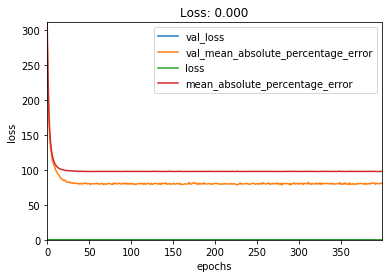

In [16]:
historydf = pd.DataFrame(history_k.history, index=history_k.epoch)
plt.figure(figsize=(8, 6))
historydf.plot(ylim=(0, historydf.values.max()))
plt.title('Loss: %.3f' % history_k.history['loss'][-1])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()


In [17]:
# Verification

k = x_train_koopman.iloc[[10]]

k = np.array(k)
l = koopman.predict(k)

m = x_train_ft_codelayer_koopman.iloc[[10]]

print(m)
print(l)

          0         1         2         3         4         5         6   \
10 -0.140081  0.069946 -0.125677 -0.006985 -0.017933 -0.045872 -0.019535   

          7         8         9         10        11  
10  0.200577  0.098956  0.070629 -0.018887  0.045946  
[[-0.12275308  0.03888819 -0.10888883 -0.00142986 -0.02094492 -0.05214103
  -0.00360638  0.1881416   0.07647362  0.03630922 -0.00066587  0.07985038]]


In [18]:
# print(type(m))
# sprint(type(l))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
